In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,NaN
1,1.0,85.0,NaN,29.0,0.0,26.6,0.351,31.0
2,8.0,NaN,NaN,0.0,0.0,23.3,0.672,32.0
3,1.0,NaN,66.0,23.0,NaN,28.1,0.167,21.0
4,NaN,NaN,40.0,35.0,168.0,43.1,2.288,NaN
...,...,...,...,...,...,...,...,...
763,10.0,NaN,76.0,NaN,180.0,32.9,0.171,63.0
764,2.0,NaN,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,NaN,0.245,NaN
766,1.0,126.0,60.0,0.0,NaN,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	152
float64		column 2	266
float64		column 3	190
float64		column 4	76
float64		column 5	152
float64		column 6	190
float64		column 7	38
float64		column 8	152


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,616.000000,502.000000,578.000000,692.000000,616.000000,578.000000,730.000000,616.000000
mean,3.737013,118.121514,69.586505,20.307803,78.581169,31.616955,0.466251,32.829545
std,3.065517,28.220319,16.250006,15.454028,113.228311,7.587358,0.322022,11.013008
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,101.000000,64.000000,0.000000,0.000000,27.500000,0.244000,24.000000
50%,3.000000,116.000000,71.000000,23.000000,42.500000,31.750000,0.370000,29.000000
75%,6.000000,131.750000,78.000000,32.000000,120.000000,35.500000,0.611500,39.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.329000,72.000000


<AxesSubplot:>

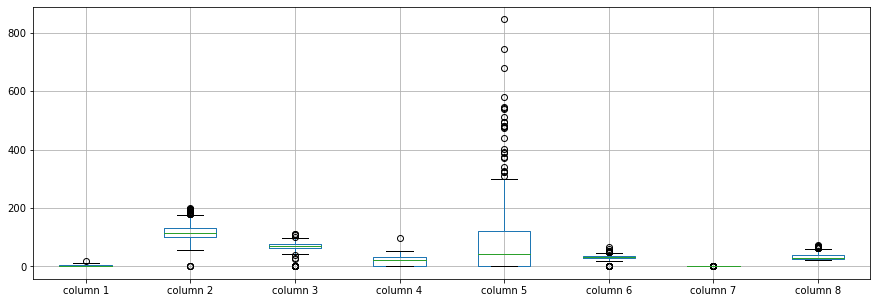

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.737013
column 2    118.121514
column 3     69.586505
column 4     20.307803
column 5     78.581169
column 6     31.616955
column 7      0.466251
column 8     32.829545
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.150651,0.134488,-0.055994,-0.081806,0.013716,-0.017709,0.516730
column 2,0.150651,1.000000,0.136791,-0.008976,0.347923,0.183784,0.186792,0.132235
column 3,0.134488,0.136791,1.000000,0.133435,0.086435,0.255541,0.053390,0.221169
column 4,-0.055994,-0.008976,0.133435,1.000000,0.406875,0.344670,0.153944,-0.120983
column 5,-0.081806,0.347923,0.086435,0.406875,1.000000,0.215450,0.185935,-0.075133
column 6,0.013716,0.183784,0.255541,0.344670,0.215450,1.000000,0.057892,0.033208
column 7,-0.017709,0.186792,0.053390,0.153944,0.185935,0.057892,1.000000,0.036441
column 8,0.516730,0.132235,0.221169,-0.120983,-0.075133,0.033208,0.036441,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+79,8+79+79,8+79+79+79,8+79+79+79+79,8+79+79+79+79+79,8+79+79+79+79+79+79,8+79+79+79+79+79,8+79+79+79+79,8+79+79+79,8+79+79,8+79,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 315.2949670155843
Epoch: 1 , loss: 314.0775152842204
Epoch: 2 , loss: 312.14217789967853
Epoch: 3 , loss: 311.64608097076416
Epoch: 4 , loss: 309.30646324157715
Epoch: 5 , loss: 306.38382625579834
Epoch: 6 , loss: 305.1729278564453
Epoch: 7 , loss: 302.36984888712567
Epoch: 8 , loss: 300.54024537404376
Epoch: 9 , loss: 295.22923787434894
Epoch: 10 , loss: 293.14669704437256
Epoch: 11 , loss: 285.1929686864217
Epoch: 12 , loss: 286.0474217732747
Epoch: 13 , loss: 282.1945807139079
Epoch: 14 , loss: 272.78598403930664
Epoch: 15 , loss: 270.2279411951701
Epoch: 16 , loss: 261.4430179595947
Epoch: 17 , loss: 264.43003877003986
Epoch: 18 , loss: 258.4416961669922
Epoch: 19 , loss: 252.740252494812
Epoch: 20 , loss: 244.37980588277182
Epoch: 21 , loss: 242.47383244832358
Epoch: 22 , loss: 239.70023695627847
Epoch: 23 , loss: 236.2597417831421
Epoch: 24 , loss: 232.52388159434
Epoch: 25 , loss: 235.35106372833

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     2.123966
column 2    66.183418
column 3    84.000000
column 4    12.817370
column 5     0.000000
column 6    35.400000
column 7     0.388000
column 8    50.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-33.172350
1,0.000000,0.000000,-1.037247,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,-145.853031,-41.361816,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,-36.296791,0.000000,0.000000,-60.635509,0.000000,0.0,0.000000
4,2.553688,-51.975586,0.000000,0.000000,0.000000,0.000000,0.0,-7.815660
...,...,...,...,...,...,...,...,...
763,0.000000,-100.530553,0.000000,-47.594230,0.000000,0.000000,0.0,0.000000
764,0.000000,18.400253,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
765,0.000000,0.000000,0.000000,0.000000,0.000000,21.639962,0.0,18.046124
766,0.000000,0.000000,0.000000,0.000000,74.343277,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2357.8999277811054, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.40818294889723267

In [18]:
new_df.iloc[66,:]

column 1     0.000000
column 2    43.038940
column 3    26.146509
column 4    30.000000
column 5     0.000000
column 6    32.500000
column 7     0.304589
column 8    38.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.000000,148.000000,72.000000,35.000000,0.000000,33.600000,0.627,16.827650
1,1.000000,85.000000,64.962753,29.000000,0.000000,26.600000,0.351,31.000000
2,8.000000,37.146969,22.638184,0.000000,0.000000,23.300000,0.672,32.000000
3,1.000000,52.703209,66.000000,23.000000,33.364491,28.100000,0.167,21.000000
4,2.553688,85.024414,40.000000,35.000000,168.000000,43.100000,2.288,25.184340
...,...,...,...,...,...,...,...,...
763,10.000000,0.469447,76.000000,0.405770,180.000000,32.900000,0.171,63.000000
764,2.000000,140.400253,70.000000,27.000000,0.000000,36.800000,0.340,27.000000
765,5.000000,121.000000,72.000000,23.000000,112.000000,47.839962,0.245,48.046124
766,1.000000,126.000000,60.000000,0.000000,74.343277,30.100000,0.349,47.000000


In [20]:
imputations[-1].to_excel("PID_NL_20.xlsx", index=False, header=False)